In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [65]:
data = pd.read_excel("Data.xlsx")

In [66]:
data.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,...,8,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65,2.91
1,1,7,0,0600-0659,2,1,27,129,Southwest Airlines Co.,13056,...,11,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65,2.91
2,1,7,0,0600-0659,7,1,27,175,Southwest Airlines Co.,13056,...,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65,2.91
3,1,7,0,0700-0759,9,1,29,175,Southwest Airlines Co.,13056,...,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65,2.91
4,1,7,0,0800-0859,1,1,25,143,Southwest Airlines Co.,13056,...,16,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65,2.91


In [67]:
data.isna().sum()

MONTH                            0
DAY_OF_WEEK                      0
DEP_DEL15                        0
DEP_TIME_BLK                     0
DISTANCE_GROUP                   0
SEGMENT_NUMBER                   0
CONCURRENT_FLIGHTS               0
NUMBER_OF_SEATS                  0
CARRIER_NAME                     0
AIRPORT_FLIGHTS_MONTH            0
AIRLINE_FLIGHTS_MONTH            0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AVG_MONTHLY_PASS_AIRPORT         0
AVG_MONTHLY_PASS_AIRLINE         0
FLT_ATTENDANTS_PER_PASS          0
GROUND_SERV_PER_PASS             0
PLANE_AGE                        0
DEPARTING_AIRPORT                0
LATITUDE                         0
LONGITUDE                        0
PREVIOUS_AIRPORT                 0
PRCP                             0
SNOW                             0
SNWD                             0
TMAX                             0
AWND                             0
dtype: int64

In [68]:
data.duplicated().sum()

852

In [69]:
data.describe()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
count,208087.000000,208087.000000,208087.000000,208087.000000,208087.000000,208087.000000,208087.000000,208087.000000,208087.000000,208087.000000,...,2.080870e+05,2.080870e+05,208087.000000,208087.000000,208087.000000,208087.000000,208087.000000,208087.000000,208087.000000,208087.000000
mean,1.558838,3.851591,0.212738,3.453671,3.243297,18.011524,151.848760,8299.635801,102281.978961,2990.147357,...,6.178236e-05,9.889412e-05,11.676347,35.848367,-98.276679,0.097515,0.093890,0.298943,54.938295,8.431593
std,0.604025,1.970393,0.409245,1.819677,1.764364,14.115922,14.510525,6079.044318,6713.291841,1756.703445,...,1.489833e-16,8.310430e-17,5.967043,4.614819,16.090775,0.272956,0.549587,1.230169,15.654798,4.117953
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,129.000000,1160.000000,94922.000000,77.000000,...,6.178236e-05,9.889412e-05,0.000000,18.440000,-122.595000,0.000000,0.000000,0.000000,-10.000000,0.000000
25%,1.000000,2.000000,0.000000,2.000000,2.000000,9.000000,143.000000,4273.000000,94922.000000,1305.000000,...,6.178236e-05,9.889412e-05,7.000000,32.847000,-115.152000,0.000000,0.000000,0.000000,45.000000,5.140000
50%,1.000000,4.000000,0.000000,3.000000,3.000000,14.000000,143.000000,6023.000000,107363.000000,3003.000000,...,6.178236e-05,9.889412e-05,13.000000,36.080000,-95.890000,0.000000,0.000000,0.000000,57.000000,7.830000
75%,2.000000,5.000000,0.000000,4.000000,4.000000,24.000000,175.000000,11861.000000,107363.000000,4769.000000,...,6.178236e-05,9.889412e-05,16.000000,39.298000,-84.427000,0.040000,0.000000,0.000000,65.000000,10.960000
max,3.000000,7.000000,1.000000,11.000000,10.000000,94.000000,175.000000,33799.000000,114119.000000,6398.000000,...,6.178236e-05,9.889412e-05,22.000000,47.447000,-66.002000,4.600000,17.200000,25.200000,88.000000,30.420000


In [70]:
data["DEP_TIME_BLK"].value_counts()

0600-0659    16474
0800-0859    14936
1900-1959    14140
1000-1059    14140
1600-1659    13380
1800-1859    12965
1700-1759    12782
1400-1459    12553
0700-0759    12475
1100-1159    12390
1300-1359    12368
1200-1259    12126
1500-1559    12027
0900-0959    11489
2000-2059     9200
2100-2159     8985
0001-0559     3586
2200-2259     2041
2300-2359       30
Name: DEP_TIME_BLK, dtype: int64

In [71]:
data["DEPARTING_AIRPORT"].value_counts()

McCarran International              12021
Dallas Love Field                   10614
Stapleton International             10603
Phoenix Sky Harbor International    10409
Friendship International            10341
                                    ...  
Des Moines Municipal                  170
Richmond International                169
Greenville-Spartanburg                 87
Puerto Rico International              12
Rochester Monroe County                10
Name: DEPARTING_AIRPORT, Length: 71, dtype: int64

In [72]:
data["PREVIOUS_AIRPORT"].value_counts()

NONE                                41309
Dallas Love Field                    8016
McCarran International               7776
Chicago Midway International         7707
Phoenix Sky Harbor International     7475
                                    ...  
Des Moines Municipal                  173
Pensacola Regional                    170
Richmond International                165
Greenville-Spartanburg                164
Honolulu International                  2
Name: PREVIOUS_AIRPORT, Length: 87, dtype: int64

In [73]:
data.drop("CARRIER_NAME",axis=1,inplace=True) 
data.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,0800-0859,2,1,25,143,13056,107363,...,8,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65,2.91
1,1,7,0,0600-0659,2,1,27,129,13056,107363,...,11,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65,2.91
2,1,7,0,0600-0659,7,1,27,175,13056,107363,...,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65,2.91
3,1,7,0,0700-0759,9,1,29,175,13056,107363,...,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65,2.91
4,1,7,0,0800-0859,1,1,25,143,13056,107363,...,16,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65,2.91


In [74]:
data.drop("DEP_TIME_BLK",axis=1,inplace=True) 
data.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,2,1,25,143,13056,107363,5873,...,8,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65,2.91
1,1,7,0,2,1,27,129,13056,107363,5873,...,11,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65,2.91
2,1,7,0,7,1,27,175,13056,107363,5873,...,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65,2.91
3,1,7,0,9,1,29,175,13056,107363,5873,...,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65,2.91
4,1,7,0,1,1,25,143,13056,107363,5873,...,16,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65,2.91


In [75]:
data["AIRLINE_AIRPORT_FLIGHTS_MONTH"].value_counts()

5873    5873
5665    5665
5414    5414
5259    5259
5104    5104
        ... 
296        9
231        8
247        8
92         6
87         3
Name: AIRLINE_AIRPORT_FLIGHTS_MONTH, Length: 187, dtype: int64

In [76]:
data.drop("AVG_MONTHLY_PASS_AIRLINE",axis=1,inplace=True) 
data.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,2,1,25,143,13056,107363,5873,...,8,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65,2.91
1,1,7,0,2,1,27,129,13056,107363,5873,...,11,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65,2.91
2,1,7,0,7,1,27,175,13056,107363,5873,...,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65,2.91
3,1,7,0,9,1,29,175,13056,107363,5873,...,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65,2.91
4,1,7,0,1,1,25,143,13056,107363,5873,...,16,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65,2.91


In [77]:
data.drop("FLT_ATTENDANTS_PER_PASS",axis=1,inplace=True) 
data.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,2,1,25,143,13056,107363,5873,...,8,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65,2.91
1,1,7,0,2,1,27,129,13056,107363,5873,...,11,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65,2.91
2,1,7,0,7,1,27,175,13056,107363,5873,...,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65,2.91
3,1,7,0,9,1,29,175,13056,107363,5873,...,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65,2.91
4,1,7,0,1,1,25,143,13056,107363,5873,...,16,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65,2.91


In [78]:
data.drop("GROUND_SERV_PER_PASS",axis=1,inplace=True) 
data.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,2,1,25,143,13056,107363,5873,...,8,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65,2.91
1,1,7,0,2,1,27,129,13056,107363,5873,...,11,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65,2.91
2,1,7,0,7,1,27,175,13056,107363,5873,...,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65,2.91
3,1,7,0,9,1,29,175,13056,107363,5873,...,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65,2.91
4,1,7,0,1,1,25,143,13056,107363,5873,...,16,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65,2.91


In [79]:
data[['MONTH', 'DAY_OF_WEEK','DISTANCE_GROUP','SEGMENT_NUMBER']] = data[['MONTH', 'DAY_OF_WEEK','DISTANCE_GROUP','SEGMENT_NUMBER']].astype(object)


In [80]:
df=pd.get_dummies(data[['MONTH', 'DAY_OF_WEEK','DISTANCE_GROUP','SEGMENT_NUMBER','DEPARTING_AIRPORT','PREVIOUS_AIRPORT']])
df.head()

,MONTH_1,MONTH_2,MONTH_3,DAY_OF_WEEK_1,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,...,PREVIOUS_AIRPORT_Stapleton International,PREVIOUS_AIRPORT_Tampa International,PREVIOUS_AIRPORT_Theodore Francis Green State,PREVIOUS_AIRPORT_Tucson International,PREVIOUS_AIRPORT_Tulsa International,PREVIOUS_AIRPORT_Valley International,PREVIOUS_AIRPORT_Washington Dulles International,PREVIOUS_AIRPORT_Wichita Mid-Continent,PREVIOUS_AIRPORT_Will Rogers World,PREVIOUS_AIRPORT_William P Hobby
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [81]:
list(df.columns)

['MONTH_1',
 'MONTH_2',
 'MONTH_3',
 'DAY_OF_WEEK_1',
 'DAY_OF_WEEK_2',
 'DAY_OF_WEEK_3',
 'DAY_OF_WEEK_4',
 'DAY_OF_WEEK_5',
 'DAY_OF_WEEK_6',
 'DAY_OF_WEEK_7',
 'DISTANCE_GROUP_1',
 'DISTANCE_GROUP_2',
 'DISTANCE_GROUP_3',
 'DISTANCE_GROUP_4',
 'DISTANCE_GROUP_5',
 'DISTANCE_GROUP_6',
 'DISTANCE_GROUP_7',
 'DISTANCE_GROUP_8',
 'DISTANCE_GROUP_9',
 'DISTANCE_GROUP_10',
 'DISTANCE_GROUP_11',
 'SEGMENT_NUMBER_1',
 'SEGMENT_NUMBER_2',
 'SEGMENT_NUMBER_3',
 'SEGMENT_NUMBER_4',
 'SEGMENT_NUMBER_5',
 'SEGMENT_NUMBER_6',
 'SEGMENT_NUMBER_7',
 'SEGMENT_NUMBER_8',
 'SEGMENT_NUMBER_9',
 'SEGMENT_NUMBER_10',
 'DEPARTING_AIRPORT_Albuquerque International Sunport',
 'DEPARTING_AIRPORT_Atlanta Municipal',
 'DEPARTING_AIRPORT_Austin - Bergstrom International',
 'DEPARTING_AIRPORT_Birmingham Airport',
 'DEPARTING_AIRPORT_Boise Air Terminal',
 'DEPARTING_AIRPORT_Bradley International',
 'DEPARTING_AIRPORT_Charleston International',
 'DEPARTING_AIRPORT_Chicago Midway International',
 'DEPARTING_AIRPORT

In [82]:
df.drop(["MONTH_1","DAY_OF_WEEK_1","DISTANCE_GROUP_1","SEGMENT_NUMBER_1","DEPARTING_AIRPORT_Albuquerque International Sunport","PREVIOUS_AIRPORT_Adams Field"],axis=1,inplace=True)
df.head()

,MONTH_2,MONTH_3,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,DISTANCE_GROUP_2,DISTANCE_GROUP_3,...,PREVIOUS_AIRPORT_Stapleton International,PREVIOUS_AIRPORT_Tampa International,PREVIOUS_AIRPORT_Theodore Francis Green State,PREVIOUS_AIRPORT_Tucson International,PREVIOUS_AIRPORT_Tulsa International,PREVIOUS_AIRPORT_Valley International,PREVIOUS_AIRPORT_Washington Dulles International,PREVIOUS_AIRPORT_Wichita Mid-Continent,PREVIOUS_AIRPORT_Will Rogers World,PREVIOUS_AIRPORT_William P Hobby
0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
data_new=pd.concat([data,df],axis=1)
data_new.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,PREVIOUS_AIRPORT_Stapleton International,PREVIOUS_AIRPORT_Tampa International,PREVIOUS_AIRPORT_Theodore Francis Green State,PREVIOUS_AIRPORT_Tucson International,PREVIOUS_AIRPORT_Tulsa International,PREVIOUS_AIRPORT_Valley International,PREVIOUS_AIRPORT_Washington Dulles International,PREVIOUS_AIRPORT_Wichita Mid-Continent,PREVIOUS_AIRPORT_Will Rogers World,PREVIOUS_AIRPORT_William P Hobby
0,1,7,0,2,1,25,143,13056,107363,5873,...,0,0,0,0,0,0,0,0,0,0
1,1,7,0,2,1,27,129,13056,107363,5873,...,0,0,0,0,0,0,0,0,0,0
2,1,7,0,7,1,27,175,13056,107363,5873,...,0,0,0,0,0,0,0,0,0,0
3,1,7,0,9,1,29,175,13056,107363,5873,...,0,0,0,0,0,0,0,0,0,0
4,1,7,0,1,1,25,143,13056,107363,5873,...,0,0,0,0,0,0,0,0,0,0


In [84]:
data_new.drop(["MONTH","DAY_OF_WEEK","DISTANCE_GROUP","SEGMENT_NUMBER","DEPARTING_AIRPORT","PREVIOUS_AIRPORT"],axis=1,inplace=True)
data_new.head()

,DEP_DEL15,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,PLANE_AGE,LATITUDE,LONGITUDE,...,PREVIOUS_AIRPORT_Stapleton International,PREVIOUS_AIRPORT_Tampa International,PREVIOUS_AIRPORT_Theodore Francis Green State,PREVIOUS_AIRPORT_Tucson International,PREVIOUS_AIRPORT_Tulsa International,PREVIOUS_AIRPORT_Valley International,PREVIOUS_AIRPORT_Washington Dulles International,PREVIOUS_AIRPORT_Wichita Mid-Continent,PREVIOUS_AIRPORT_Will Rogers World,PREVIOUS_AIRPORT_William P Hobby
0,0,25,143,13056,107363,5873,1903352,8,36.08,-115.152,...,0,0,0,0,0,0,0,0,0,0
1,0,27,129,13056,107363,5873,1903352,11,36.08,-115.152,...,0,0,0,0,0,0,0,0,0,0
2,0,27,175,13056,107363,5873,1903352,2,36.08,-115.152,...,0,0,0,0,0,0,0,0,0,0
3,0,29,175,13056,107363,5873,1903352,2,36.08,-115.152,...,0,0,0,0,0,0,0,0,0,0
4,0,25,143,13056,107363,5873,1903352,16,36.08,-115.152,...,0,0,0,0,0,0,0,0,0,0


In [85]:
list(data_new.columns)

['DEP_DEL15',
 'CONCURRENT_FLIGHTS',
 'NUMBER_OF_SEATS',
 'AIRPORT_FLIGHTS_MONTH',
 'AIRLINE_FLIGHTS_MONTH',
 'AIRLINE_AIRPORT_FLIGHTS_MONTH',
 'AVG_MONTHLY_PASS_AIRPORT',
 'PLANE_AGE',
 'LATITUDE',
 'LONGITUDE',
 'PRCP',
 'SNOW',
 'SNWD',
 'TMAX',
 'AWND',
 'MONTH_2',
 'MONTH_3',
 'DAY_OF_WEEK_2',
 'DAY_OF_WEEK_3',
 'DAY_OF_WEEK_4',
 'DAY_OF_WEEK_5',
 'DAY_OF_WEEK_6',
 'DAY_OF_WEEK_7',
 'DISTANCE_GROUP_2',
 'DISTANCE_GROUP_3',
 'DISTANCE_GROUP_4',
 'DISTANCE_GROUP_5',
 'DISTANCE_GROUP_6',
 'DISTANCE_GROUP_7',
 'DISTANCE_GROUP_8',
 'DISTANCE_GROUP_9',
 'DISTANCE_GROUP_10',
 'DISTANCE_GROUP_11',
 'SEGMENT_NUMBER_2',
 'SEGMENT_NUMBER_3',
 'SEGMENT_NUMBER_4',
 'SEGMENT_NUMBER_5',
 'SEGMENT_NUMBER_6',
 'SEGMENT_NUMBER_7',
 'SEGMENT_NUMBER_8',
 'SEGMENT_NUMBER_9',
 'SEGMENT_NUMBER_10',
 'DEPARTING_AIRPORT_Atlanta Municipal',
 'DEPARTING_AIRPORT_Austin - Bergstrom International',
 'DEPARTING_AIRPORT_Birmingham Airport',
 'DEPARTING_AIRPORT_Boise Air Terminal',
 'DEPARTING_AIRPORT_Bradley Int

In [86]:
data["DEP_DEL15"].value_counts()

0    163819
1     44268
Name: DEP_DEL15, dtype: int64

In [87]:
dt_new = data[['CONCURRENT_FLIGHTS','NUMBER_OF_SEATS','AIRPORT_FLIGHTS_MONTH','AIRLINE_FLIGHTS_MONTH','AIRLINE_AIRPORT_FLIGHTS_MONTH',
              'AVG_MONTHLY_PASS_AIRPORT','PLANE_AGE','LATITUDE','LONGITUDE','PRCP','SNOW','SNWD','TMAX','AWND']]

In [88]:
dt_new.head()

,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
0,25,143,13056,107363,5873,1903352,8,36.08,-115.152,0.0,0.0,0.0,65,2.91
1,27,129,13056,107363,5873,1903352,11,36.08,-115.152,0.0,0.0,0.0,65,2.91
2,27,175,13056,107363,5873,1903352,2,36.08,-115.152,0.0,0.0,0.0,65,2.91
3,29,175,13056,107363,5873,1903352,2,36.08,-115.152,0.0,0.0,0.0,65,2.91
4,25,143,13056,107363,5873,1903352,16,36.08,-115.152,0.0,0.0,0.0,65,2.91


## Checking distribution of all numerical variables

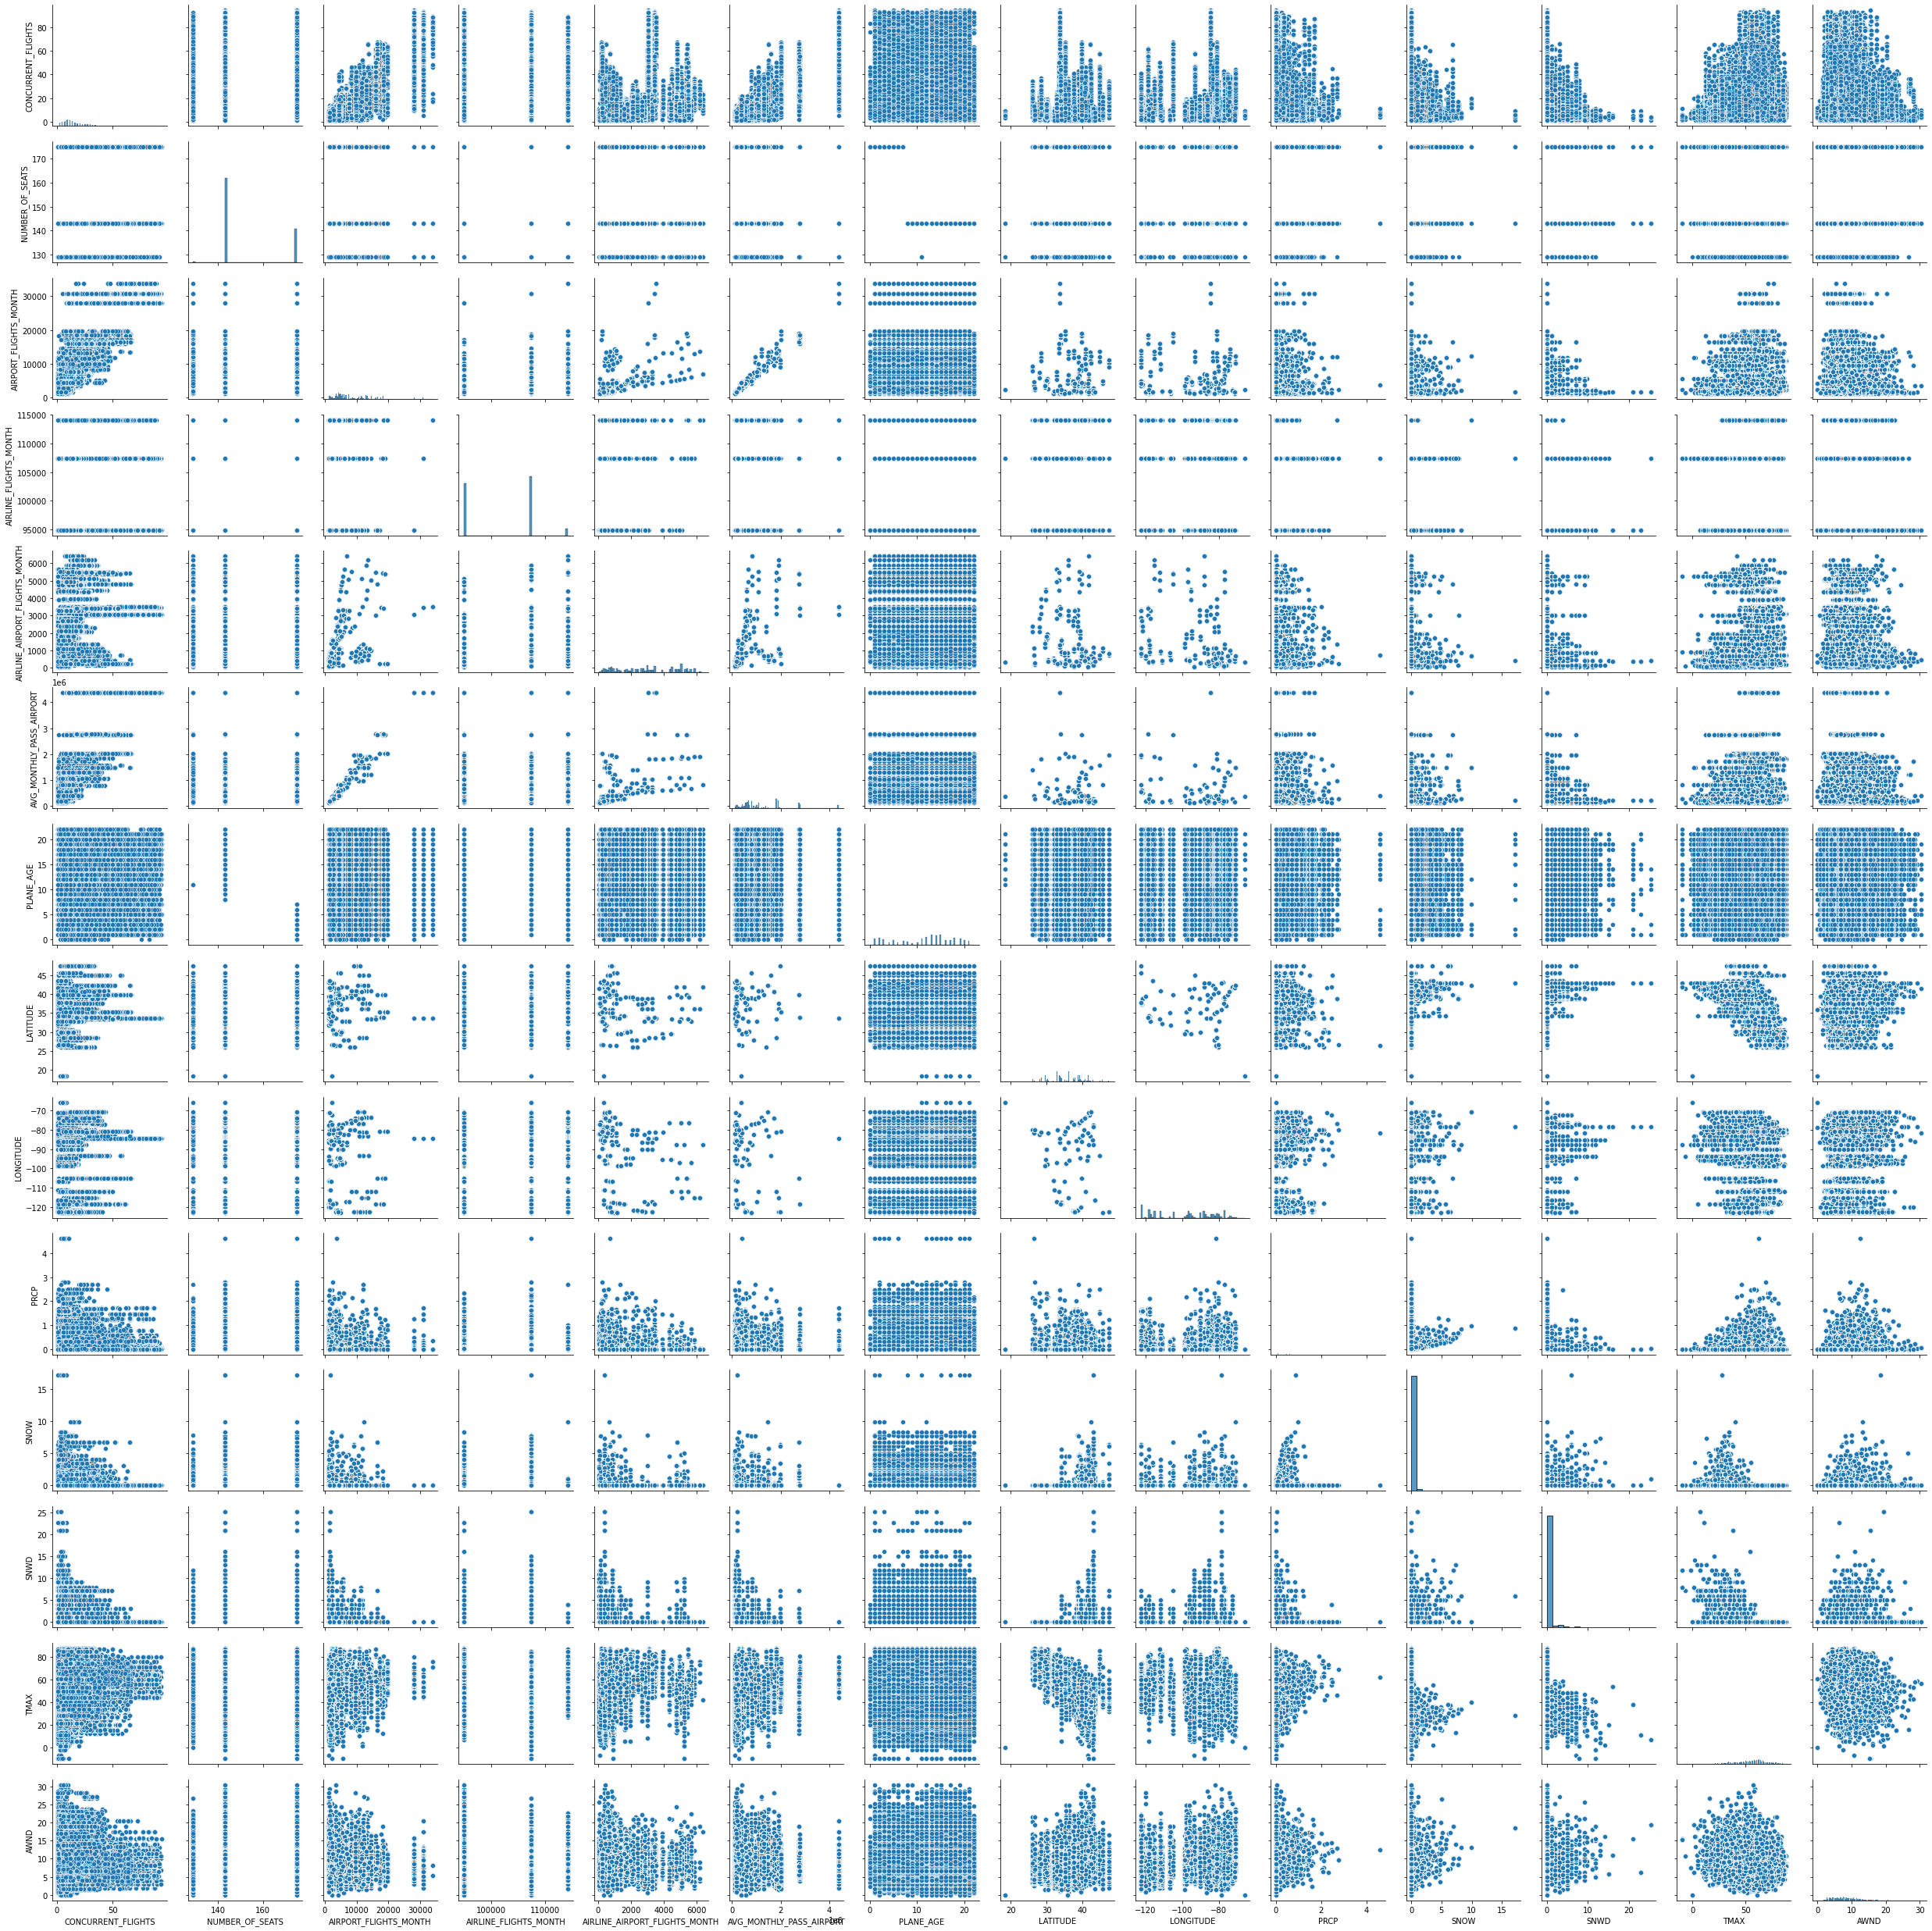

In [146]:
sns.pairplot(dt_new[dt_new.columns])
plt.show()

## Cheking the correlation among all the numerical variables

In [144]:
dt_new[dt_new.columns].corr()

,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
CONCURRENT_FLIGHTS,1.000000,0.038384,0.865040,0.023841,0.311559,0.851178,-0.031679,-0.028353,0.038679,-0.019518,-0.035313,-0.095774,0.091450,-0.026483
NUMBER_OF_SEATS,0.038384,1.000000,0.041345,-0.011273,0.096093,0.056505,-0.844450,0.015256,0.027020,-0.008928,0.011036,0.008396,-0.004718,0.004379
AIRPORT_FLIGHTS_MONTH,0.865040,0.041345,1.000000,0.105954,0.369585,0.977528,-0.033569,-0.039702,-0.009816,-0.013653,-0.032345,-0.112423,0.118604,-0.039944
AIRLINE_FLIGHTS_MONTH,0.023841,-0.011273,0.105954,1.000000,0.094523,0.017993,0.012760,0.018509,0.008792,-0.038931,-0.026678,-0.025777,0.017842,-0.072287
AIRLINE_AIRPORT_FLIGHTS_MONTH,0.311559,0.096093,0.369585,0.094523,1.000000,0.382488,-0.081038,-0.083319,-0.146040,-0.077892,-0.010628,-0.031964,0.042427,-0.064004
AVG_MONTHLY_PASS_AIRPORT,0.851178,0.056505,0.977528,0.017993,0.382488,1.000000,-0.046639,-0.039432,-0.056488,-0.009875,-0.023808,-0.105311,0.120589,-0.036704
PLANE_AGE,-0.031679,-0.844450,-0.033569,0.012760,-0.081038,-0.046639,1.000000,-0.016477,-0.022436,0.007765,-0.011273,-0.009769,0.009002,-0.004765
LATITUDE,-0.028353,0.015256,-0.039702,0.018509,-0.083319,-0.039432,-0.016477,1.000000,-0.040915,-0.009433,0.162860,0.247149,-0.679678,0.144794
LONGITUDE,0.038679,0.027020,-0.009816,0.008792,-0.146040,-0.056488,-0.022436,-0.040915,1.000000,-0.016634,0.044805,0.089794,-0.120983,0.163390
PRCP,-0.019518,-0.008928,-0.013653,-0.038931,-0.077892,-0.009875,0.007765,-0.009433,-0.016634,1.000000,0.132254,-0.008714,-0.004087,0.207164


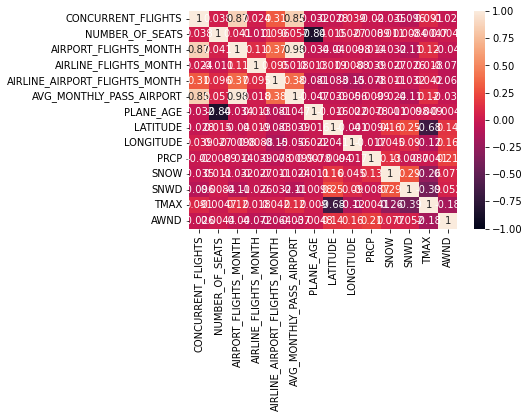

In [156]:
sns.heatmap(dt_new[dt_new.columns].corr(),annot=True,vmin=-1,vmax=1)
plt.show()

## Checking the age with delay status

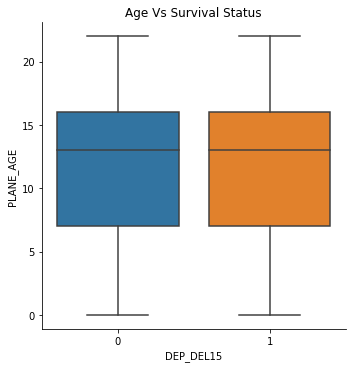

In [161]:
sns.catplot(data= data_new,x="DEP_DEL15",y="PLANE_AGE",kind="box")
plt.title("Age Vs Survival Status")
plt.show()

## Checking the age with delay status

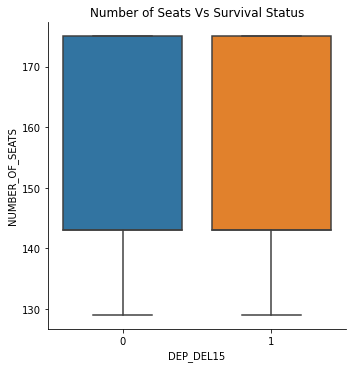

In [160]:
sns.catplot(data= data_new,x="DEP_DEL15",y="NUMBER_OF_SEATS",kind="box")
plt.title("Number of Seats Vs Survival Status")
plt.show()

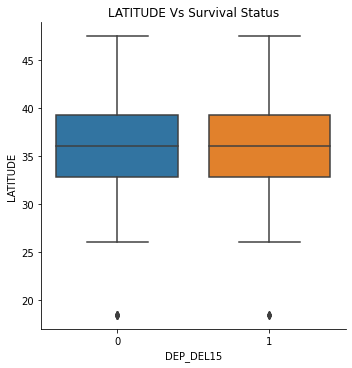

In [162]:
sns.catplot(data= data_new,x="DEP_DEL15",y="LATITUDE",kind="box")
plt.title("LATITUDE Vs Survival Status")
plt.show()

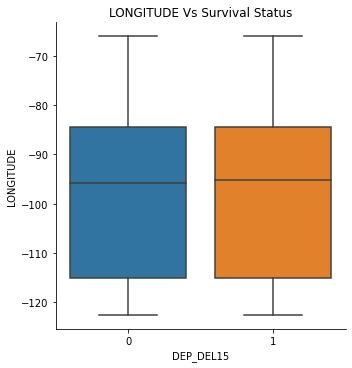

In [163]:
sns.catplot(data= data_new,x="DEP_DEL15",y="LONGITUDE",kind="box")
plt.title("LONGITUDE Vs Survival Status")
plt.show()

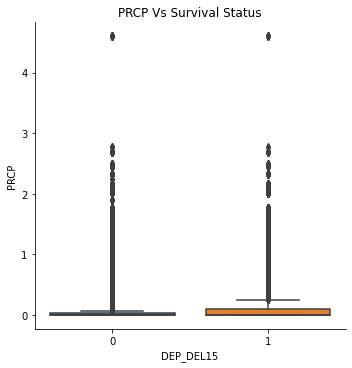

In [164]:
sns.catplot(data= data_new,x="DEP_DEL15",y="PRCP",kind="box")
plt.title("PRCP Vs Survival Status")
plt.show()

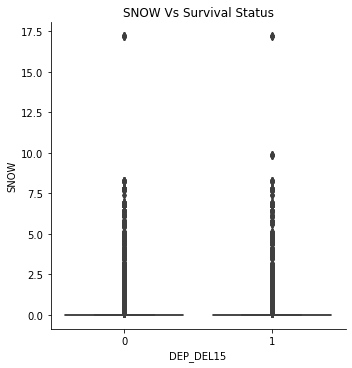

In [165]:
sns.catplot(data= data_new,x="DEP_DEL15",y="SNOW",kind="box")
plt.title("SNOW Vs Survival Status")
plt.show()

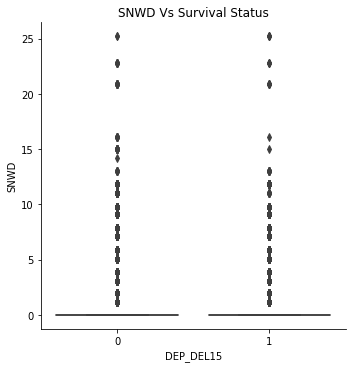

In [166]:
sns.catplot(data= data_new,x="DEP_DEL15",y="SNWD",kind="box")
plt.title("SNWD Vs Survival Status")
plt.show()

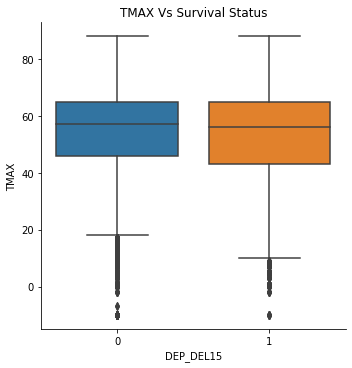

In [167]:
sns.catplot(data= data_new,x="DEP_DEL15",y="TMAX",kind="box")
plt.title("TMAX Vs Survival Status")
plt.show()

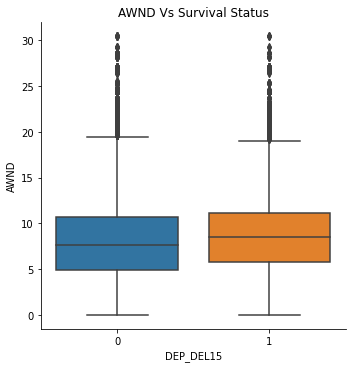

In [168]:
sns.catplot(data= data_new,x="DEP_DEL15",y="AWND",kind="box")
plt.title("AWND Vs Survival Status")
plt.show()

In [89]:
scale = StandardScaler()

In [90]:
scaled_dt = scale.fit_transform(dt_new)
scaled_dt

array([[ 0.49507875, -0.60981817,  0.78242161, ..., -0.24301003,
         0.64272493, -1.34086191],
       [ 0.63676307, -1.57463743,  0.78242161, ..., -0.24301003,
         0.64272493, -1.34086191],
       [ 0.63676307,  1.59548299,  0.78242161, ..., -0.24301003,
         0.64272493, -1.34086191],
       ...,
       [ 0.35339442, -0.60981817,  0.5366587 , ..., -0.24301003,
         0.64272493,  1.37408573],
       [ 0.35339442,  1.59548299,  0.5366587 , ..., -0.24301003,
         0.64272493,  1.37408573],
       [ 0.49507875, -0.60981817,  0.5366587 , ..., -0.24301003,
         0.64272493,  1.37408573]])

In [91]:
s_data = pd.DataFrame(scaled_dt, columns=['CONCURRENT_FLIGHTS_scaled','NUMBER_OF_SEATS_scaled','AIRPORT_FLIGHTS_MONTH_scaled','AIRLINE_FLIGHTS_MONTH_scaled','AIRLINE_AIRPORT_FLIGHTS_MONTH_scaled',
              'AVG_MONTHLY_PASS_AIRPORT_scaled','PLANE_AGE_scaled','LATITUDE_scaled','LONGITUDE_scaled','PRCP_scaled','SNOW_scaled','SNWD_scaled','TMAX_scaled','AWND_scaled'])

In [92]:
s_data.head()

,CONCURRENT_FLIGHTS_scaled,NUMBER_OF_SEATS_scaled,AIRPORT_FLIGHTS_MONTH_scaled,AIRLINE_FLIGHTS_MONTH_scaled,AIRLINE_AIRPORT_FLIGHTS_MONTH_scaled,AVG_MONTHLY_PASS_AIRPORT_scaled,PLANE_AGE_scaled,LATITUDE_scaled,LONGITUDE_scaled,PRCP_scaled,SNOW_scaled,SNWD_scaled,TMAX_scaled,AWND_scaled
0,0.495079,-0.609818,0.782422,0.756862,1.641062,0.773243,-0.616110,0.050193,-1.04876,-0.357254,-0.170838,-0.24301,0.642725,-1.340862
1,0.636763,-1.574637,0.782422,0.756862,1.641062,0.773243,-0.113347,0.050193,-1.04876,-0.357254,-0.170838,-0.24301,0.642725,-1.340862
2,0.636763,1.595483,0.782422,0.756862,1.641062,0.773243,-1.621636,0.050193,-1.04876,-0.357254,-0.170838,-0.24301,0.642725,-1.340862
3,0.778447,1.595483,0.782422,0.756862,1.641062,0.773243,-1.621636,0.050193,-1.04876,-0.357254,-0.170838,-0.24301,0.642725,-1.340862
4,0.495079,-0.609818,0.782422,0.756862,1.641062,0.773243,0.724591,0.050193,-1.04876,-0.357254,-0.170838,-0.24301,0.642725,-1.340862


In [93]:
scaled_data =pd.concat([data_new,s_data],axis=1)
scaled_data.head()

,DEP_DEL15,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,PLANE_AGE,LATITUDE,LONGITUDE,...,AIRLINE_AIRPORT_FLIGHTS_MONTH_scaled,AVG_MONTHLY_PASS_AIRPORT_scaled,PLANE_AGE_scaled,LATITUDE_scaled,LONGITUDE_scaled,PRCP_scaled,SNOW_scaled,SNWD_scaled,TMAX_scaled,AWND_scaled
0,0,25,143,13056,107363,5873,1903352,8,36.08,-115.152,...,1.641062,0.773243,-0.616110,0.050193,-1.04876,-0.357254,-0.170838,-0.24301,0.642725,-1.340862
1,0,27,129,13056,107363,5873,1903352,11,36.08,-115.152,...,1.641062,0.773243,-0.113347,0.050193,-1.04876,-0.357254,-0.170838,-0.24301,0.642725,-1.340862
2,0,27,175,13056,107363,5873,1903352,2,36.08,-115.152,...,1.641062,0.773243,-1.621636,0.050193,-1.04876,-0.357254,-0.170838,-0.24301,0.642725,-1.340862
3,0,29,175,13056,107363,5873,1903352,2,36.08,-115.152,...,1.641062,0.773243,-1.621636,0.050193,-1.04876,-0.357254,-0.170838,-0.24301,0.642725,-1.340862
4,0,25,143,13056,107363,5873,1903352,16,36.08,-115.152,...,1.641062,0.773243,0.724591,0.050193,-1.04876,-0.357254,-0.170838,-0.24301,0.642725,-1.340862


In [94]:
scaled_data.drop(['CONCURRENT_FLIGHTS','NUMBER_OF_SEATS','AIRPORT_FLIGHTS_MONTH','AIRLINE_FLIGHTS_MONTH','AIRLINE_AIRPORT_FLIGHTS_MONTH',
              'AVG_MONTHLY_PASS_AIRPORT','PLANE_AGE','LATITUDE','LONGITUDE','PRCP','SNOW','SNWD','TMAX','AWND'],axis=1,inplace=True)
scaled_data.head()

,DEP_DEL15,MONTH_2,MONTH_3,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,DISTANCE_GROUP_2,...,AIRLINE_AIRPORT_FLIGHTS_MONTH_scaled,AVG_MONTHLY_PASS_AIRPORT_scaled,PLANE_AGE_scaled,LATITUDE_scaled,LONGITUDE_scaled,PRCP_scaled,SNOW_scaled,SNWD_scaled,TMAX_scaled,AWND_scaled
0,0,0,0,0,0,0,0,0,1,1,...,1.641062,0.773243,-0.616110,0.050193,-1.04876,-0.357254,-0.170838,-0.24301,0.642725,-1.340862
1,0,0,0,0,0,0,0,0,1,1,...,1.641062,0.773243,-0.113347,0.050193,-1.04876,-0.357254,-0.170838,-0.24301,0.642725,-1.340862
2,0,0,0,0,0,0,0,0,1,0,...,1.641062,0.773243,-1.621636,0.050193,-1.04876,-0.357254,-0.170838,-0.24301,0.642725,-1.340862
3,0,0,0,0,0,0,0,0,1,0,...,1.641062,0.773243,-1.621636,0.050193,-1.04876,-0.357254,-0.170838,-0.24301,0.642725,-1.340862
4,0,0,0,0,0,0,0,0,1,0,...,1.641062,0.773243,0.724591,0.050193,-1.04876,-0.357254,-0.170838,-0.24301,0.642725,-1.340862


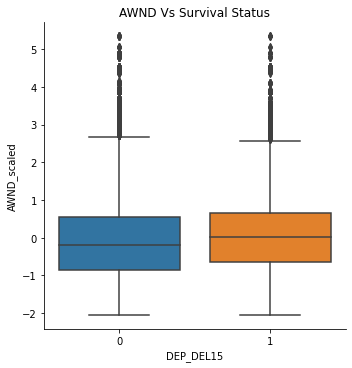

In [169]:
sns.catplot(data= scaled_data, x="DEP_DEL15",y="AWND_scaled",kind="box")
plt.title("AWND Vs Survival Status")
plt.show()

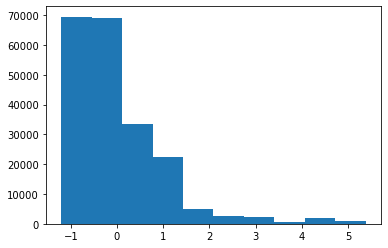

In [95]:
plt.hist(scaled_data['CONCURRENT_FLIGHTS_scaled'])
plt.show()